In [349]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [350]:
dataf = pd.read_csv("netflix.csv")

In [351]:
dataf.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


In [352]:
dataf.tail(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [353]:
for i in dataf.columns:
    null_rate = dataf[i].isna().sum() / len(dataf) * 100 
    if null_rate > 0 :
        print("{} null rate: {}%".format(i,round(null_rate,2)))

director null rate: 29.91%
cast null rate: 9.37%
country null rate: 9.44%
date_added null rate: 0.11%
rating null rate: 0.05%
duration null rate: 0.03%


In [354]:
dataf.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [355]:
dataf[dataf['rating'].isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5989,s5990,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,"Oprah Winfrey, Ava DuVernay",NaN,"January 26, 2017",2017,NaN,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
6827,s6828,TV Show,Gargantia on the Verdurous Planet,NaN,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,"December 1, 2016",2013,NaN,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."
7312,s7313,TV Show,Little Lunch,NaN,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,"February 1, 2018",2015,NaN,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."
7537,s7538,Movie,My Honor Was Loyalty,Alessandro Pepe,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,"March 1, 2017",2015,NaN,115 min,Dramas,"Amid the chaos and horror of World War II, a c..."


In [356]:
dataf['rating'].value_counts()

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64

In [357]:
dataf.shape

(8807, 12)

In [358]:
duplicate_rows_dataf = dataf[dataf.duplicated()]
print("number of duplicate rows: ", duplicate_rows_dataf.shape)

number of duplicate rows:  (0, 12)


In [359]:
dataf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [360]:
dataf.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [361]:
rating={5989:'U/A',6827:'TV-14',7312:'TV-MA',7537:'PG-13'}
for i, rate in rating.items():
    dataf.loc[i,'rating']=rate       

In [362]:
dataf['rating'].value_counts()

TV-MA       3208
TV-14       2161
TV-PG        863
R            799
PG-13        491
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
U/A            1
Name: rating, dtype: int64

In [363]:
dataf['country'].value_counts()

United States                             2818
India                                      972
United Kingdom                             419
Japan                                      245
South Korea                                199
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: country, Length: 748, dtype: int64

In [364]:
dataf['country']=dataf['country'].fillna('United States')

In [365]:
dataf['country'].value_counts()

United States                             3649
India                                      972
United Kingdom                             419
Japan                                      245
South Korea                                199
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: country, Length: 748, dtype: int64

In [366]:
dataf[dataf['director'].isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,United States,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
10,s11,TV Show,"Vendetta: Truth, Lies and The Mafia",NaN,NaN,United States,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...","Sicily boasts a bold ""Anti-Mafia"" coalition. B..."
14,s15,TV Show,Crime Stories: India Detectives,NaN,NaN,United States,"September 22, 2021",2021,TV-MA,1 Season,"British TV Shows, Crime TV Shows, Docuseries",Cameras following Bengaluru police on the job ...
...,...,...,...,...,...,...,...,...,...,...,...,...
8795,s8796,TV Show,Yu-Gi-Oh! Arc-V,NaN,"Mike Liscio, Emily Bauer, Billy Bob Thompson, ...","Japan, Canada","May 1, 2018",2015,TV-Y7,2 Seasons,"Anime Series, Kids' TV",Now that he's discovered the Pendulum Summonin...
8796,s8797,TV Show,Yunus Emre,NaN,"Gökhan Atalay, Payidar Tüfekçioglu, Baran Akbu...",Turkey,"January 17, 2017",2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas","During the Mongol invasions, Yunus Emre leaves..."
8797,s8798,TV Show,Zak Storm,NaN,"Michael Johnston, Jessica Gee-George, Christin...","United States, France, South Korea, Indonesia","September 13, 2018",2016,TV-Y7,3 Seasons,Kids' TV,Teen surfer Zak Storm is mysteriously transpor...
8800,s8801,TV Show,Zindagi Gulzar Hai,NaN,"Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...",Pakistan,"December 15, 2016",2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...","Strong-willed, middle-class Kashaf and carefre..."


In [367]:
director=dataf.dropna(subset=['director'],axis=0)  

In [368]:
director.shape

(6173, 12)

In [369]:
dataf[dataf['cast'].isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,United States,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
10,s11,TV Show,"Vendetta: Truth, Lies and The Mafia",NaN,NaN,United States,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...","Sicily boasts a bold ""Anti-Mafia"" coalition. B..."
14,s15,TV Show,Crime Stories: India Detectives,NaN,NaN,United States,"September 22, 2021",2021,TV-MA,1 Season,"British TV Shows, Crime TV Shows, Docuseries",Cameras following Bengaluru police on the job ...
16,s17,Movie,Europe's Most Dangerous Man: Otto Skorzeny in ...,"Pedro de Echave García, Pablo Azorín Williams",NaN,United States,"September 22, 2021",2020,TV-MA,67 min,"Documentaries, International Movies",Declassified documents reveal the post-WWII li...
...,...,...,...,...,...,...,...,...,...,...,...,...
8746,s8747,Movie,Winnie,Pascale Lamche,NaN,"France, Netherlands, South Africa, Finland","February 26, 2018",2017,TV-14,85 min,"Documentaries, International Movies",Winnie Mandela speaks about her extraordinary ...
8755,s8756,TV Show,Women Behind Bars,NaN,NaN,United States,"November 1, 2016",2010,TV-14,3 Seasons,"Crime TV Shows, Docuseries",This reality series recounts true stories of w...
8756,s8757,Movie,Woodstock,Barak Goodman,NaN,United States,"August 13, 2019",2019,TV-MA,97 min,"Documentaries, Music & Musicals",For the 50th anniversary of the legendary Wood...
8763,s8764,Movie,WWII: Report from the Aleutians,John Huston,NaN,United States,"March 31, 2017",1943,TV-PG,45 min,Documentaries,Filmmaker John Huston narrates this Oscar-nomi...


In [370]:
cast=dataf.dropna(subset=['cast'],axis=0)

In [371]:
cast.shape

(7982, 12)

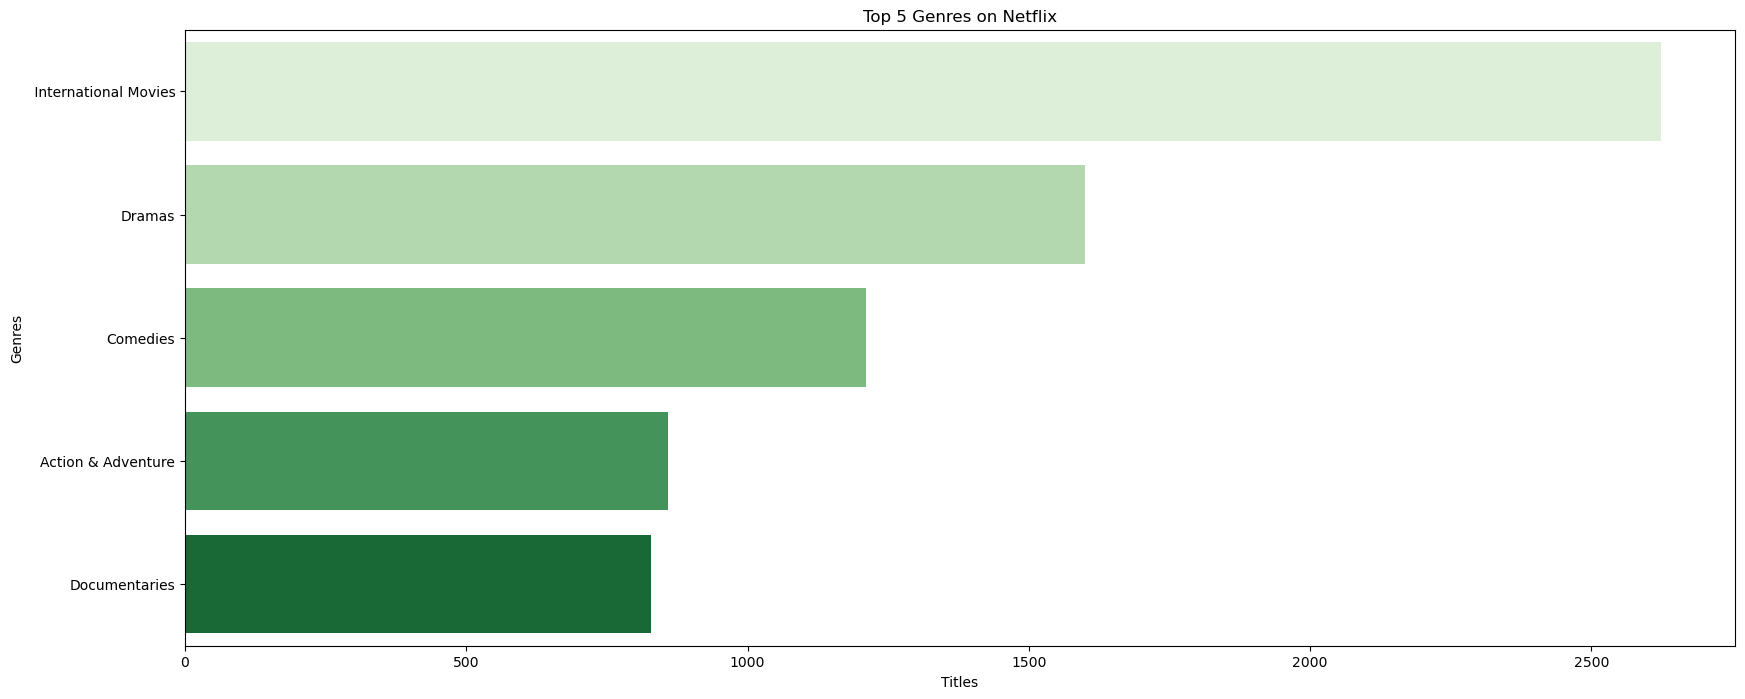

In [372]:
#q1
genre=dataf.set_index('title').listed_in.str.split(',',expand=True).stack().reset_index (level=1, drop=True);
plt.figure(figsize=(20,8))
g= sns.countplot (y = genre, order=genre.value_counts().index[:5],palette='Greens')
plt.title('Top 5 Genres on Netflix')
plt.xlabel('Titles')
plt.ylabel('Genres')
plt.show()

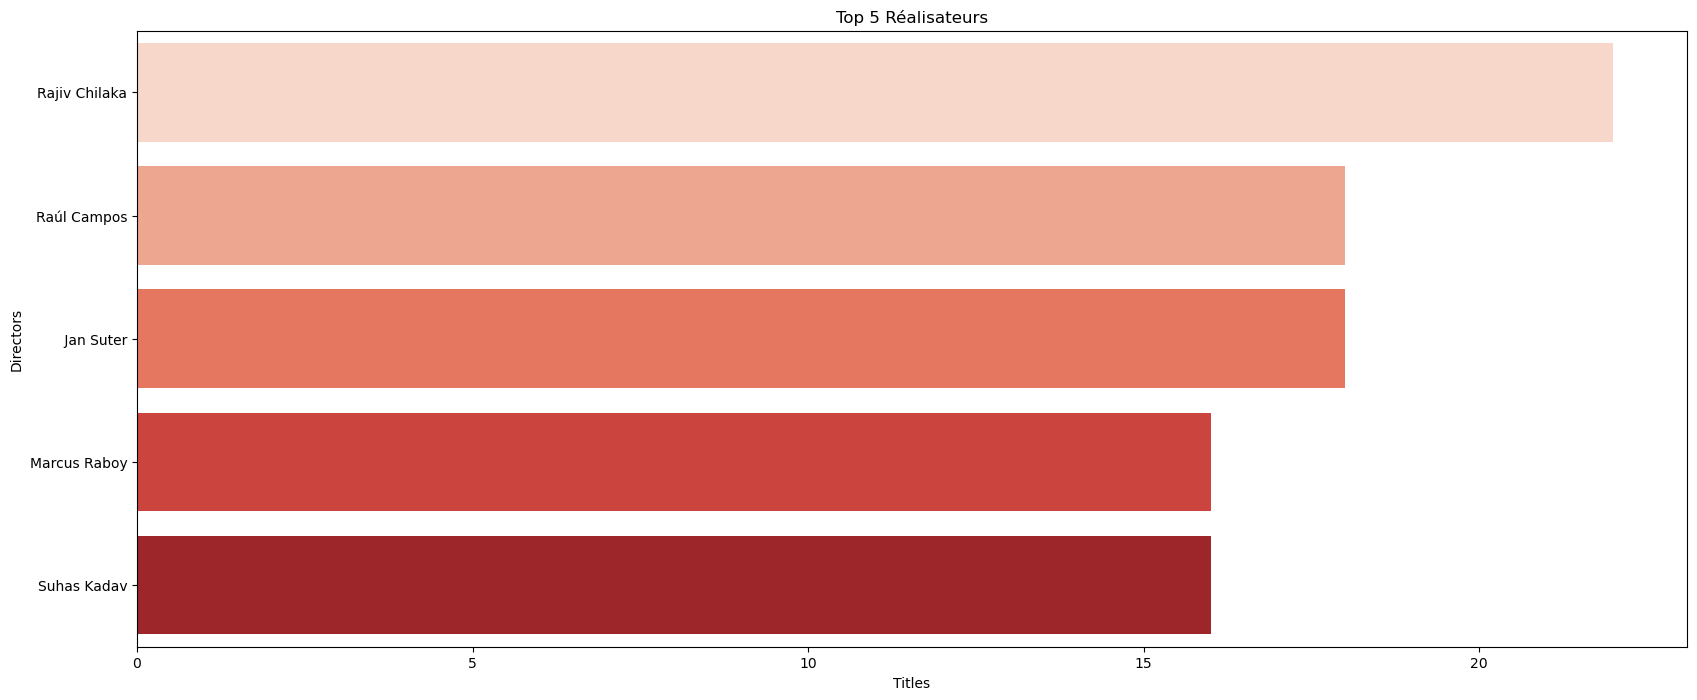

In [373]:
#q2
directors=director.set_index('title').director.str.split(',',expand=True).stack().reset_index(level=1,drop=True);
plt.figure(figsize=(20,8))
f=sns.countplot(y=directors,order=directors.value_counts().index[:5],palette='Reds')
plt.title('Top 5 Réalisateurs')
plt.xlabel('Titles')
plt.ylabel('Directors')
plt.show()

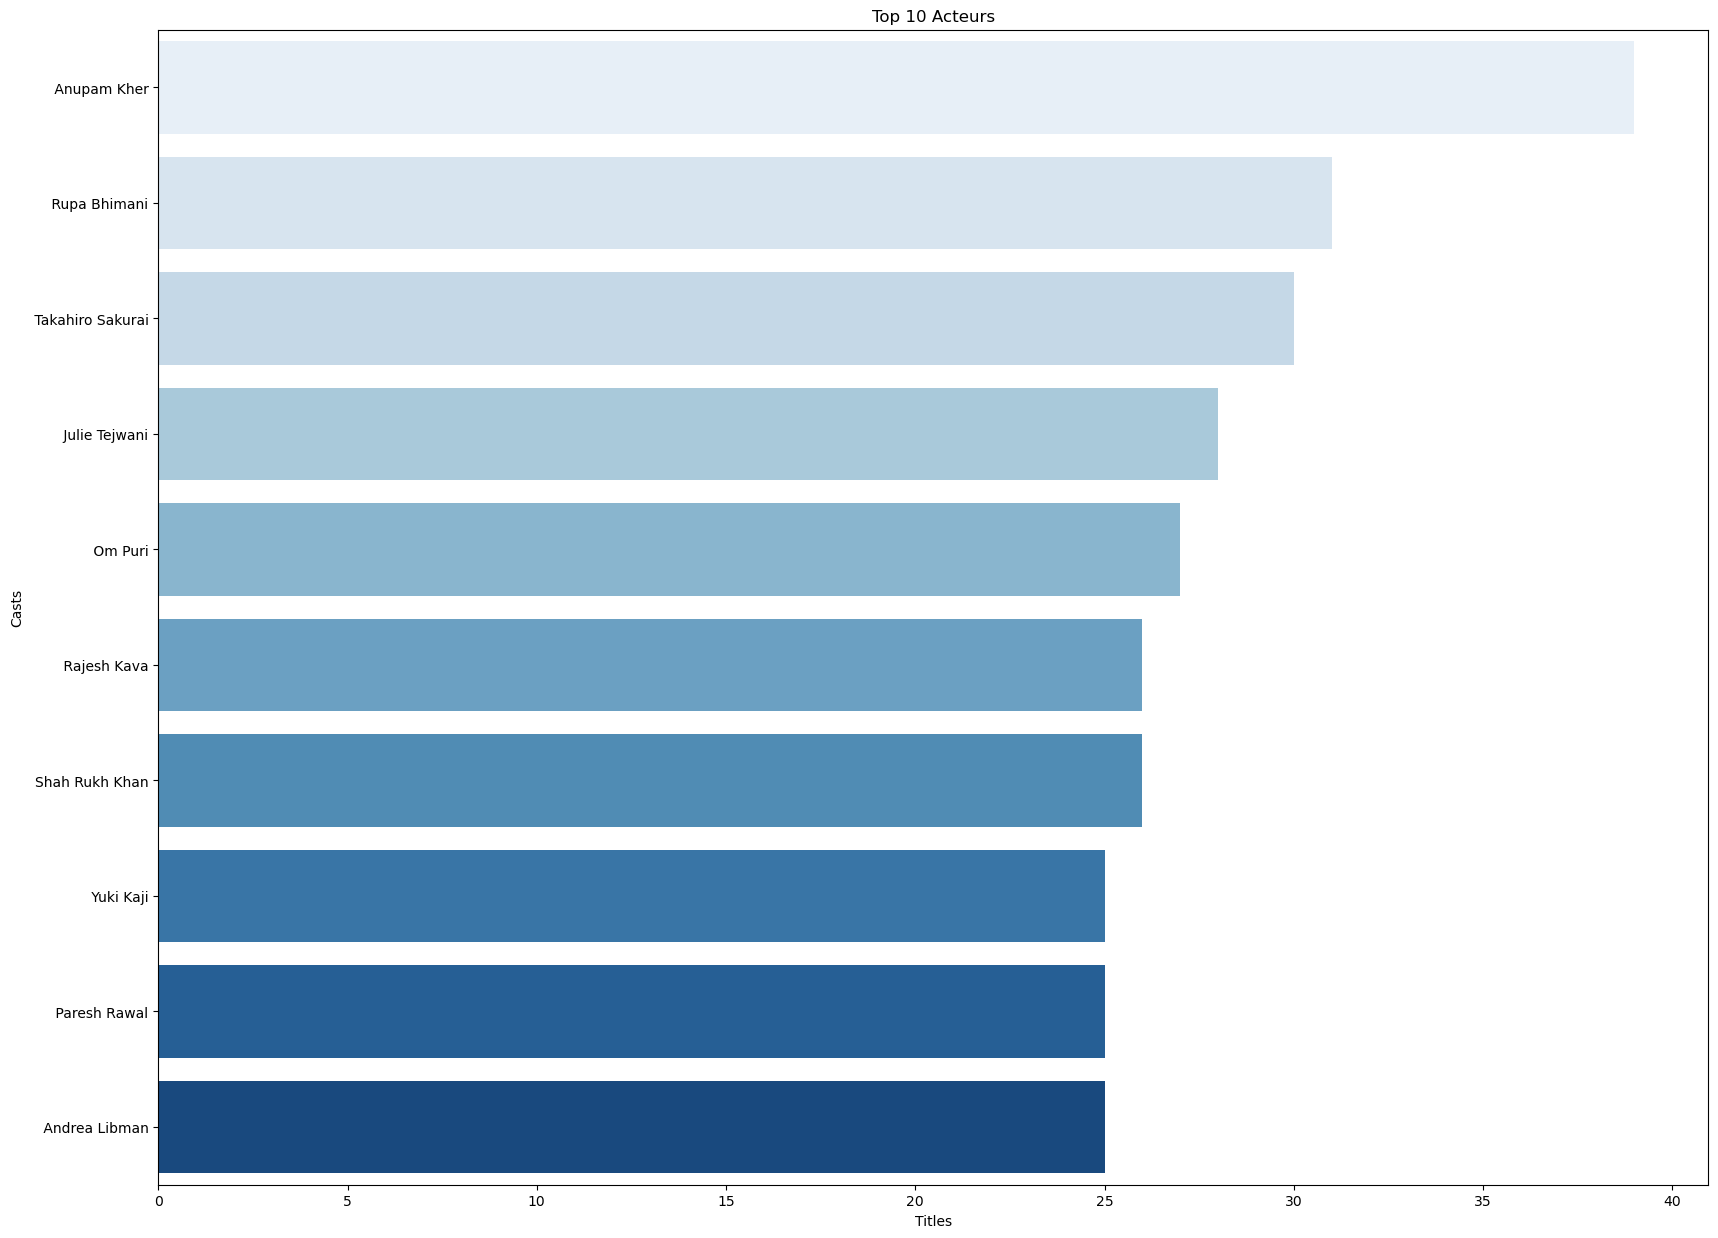

In [374]:
#q3
casts=cast.set_index('title').cast.str.split(',',expand=True).stack().reset_index(level=1,drop=True);
plt.figure(figsize=(20,15))
f=sns.countplot(y=casts,order=casts.value_counts().index[:10],palette='Blues')
plt.title('Top 10 Acteurs')
plt.xlabel('Titles')
plt.ylabel('Casts')
plt.show()

In [375]:
#q4
TvShow = dataf[dataf["type"] == "TV Show"]
TopShow=TvShow[TvShow["duration"]=="3 Seasons"]
TopShow = TopShow.head(5)
result = "The top 5 TV Shows with the highest number of seasons are: " + ", ".join(TopShow["title"].tolist())
result

"The top 5 TV Shows with the highest number of seasons are: Sex Education, Chhota Bheem, The Circle, Pororo - The Little Penguin, Kuroko's Basketball"

In [376]:
#q5
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

tfidf = TfidfVectorizer(stop_words='english')
dataf['title'] = dataf['title'].fillna('')
tfidf_matrix = tfidf.fit_transform(dataf['title'])
similarity = cosine_similarity(tfidf_matrix, tfidf_matrix)

title_index = dataf['title'].index[0]
similar_titles = list(enumerate(similarity[title_index]))
sorted_similar_titles = sorted(similar_titles, key=lambda x: x[1], reverse=True)
for i in range(10):
    print(dataf.iloc[sorted_similar_titles[i][0]]['title'])

Dick Johnson Is Dead
Dead to Me
Only the Dead
Dead Man Down
All My Friends Are Dead
Fun with Dick & Jane
Dead Kids
The Death and Life of Marsha P. Johnson
God's Not Dead
Anjelah Johnson: Not Fancy


In [377]:
#q6
last_shows = dataf[dataf["release_year"] >= 2018]
count_by_type = last_shows["type"].value_counts()

result = f"From 2018 onwards, there are {count_by_type['TV Show']} TV Shows and {count_by_type['Movie']} Movies."
tv_show_focus = count_by_type['TV Show'] > count_by_type['Movie']
if tv_show_focus:
    result += " Netflix is focusing more on TV Shows in recent years."
else:
    result += " Netflix is focusing more on Movies in recent years."

result

'From 2018 onwards, there are 1528 TV Shows and 2194 Movies. Netflix is focusing more on Movies in recent years.'

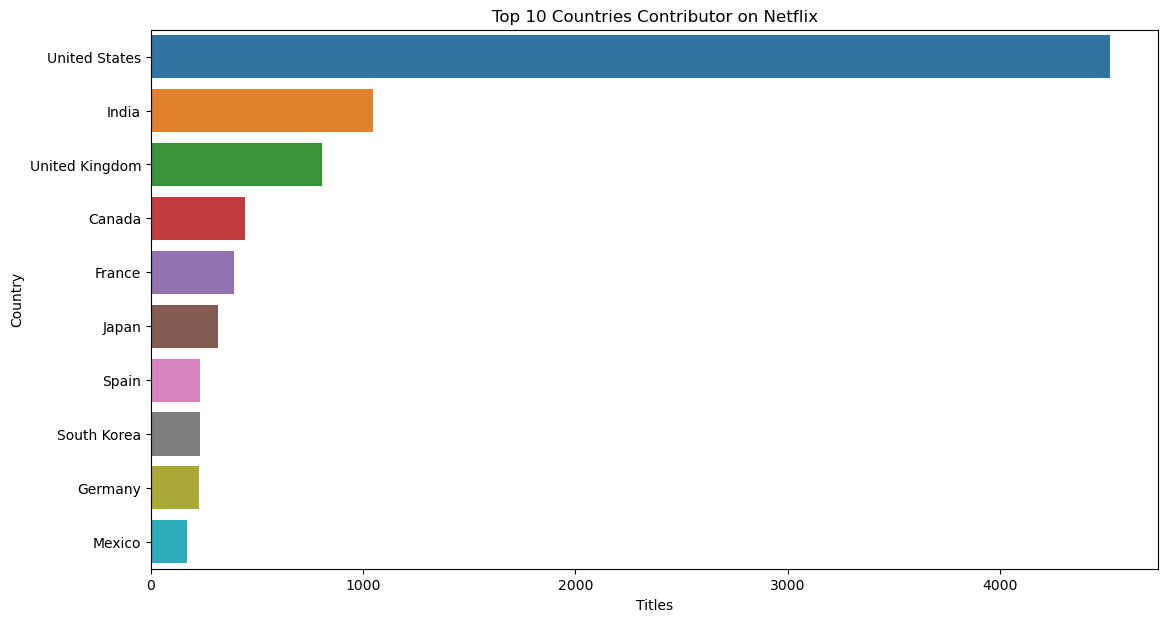

In [378]:
# Countries by the Amount of the Produces Content
countries = dataf.set_index('title').country.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);
countries = countries[countries != 'Country Unavailable']
plt.figure(figsize=(13,7))
g = sns.countplot(y = countries, order=countries.value_counts().index[:10])
plt.title('Top 10 Countries Contributor on Netflix')
plt.xlabel('Titles')
plt.ylabel('Country')
plt.show()

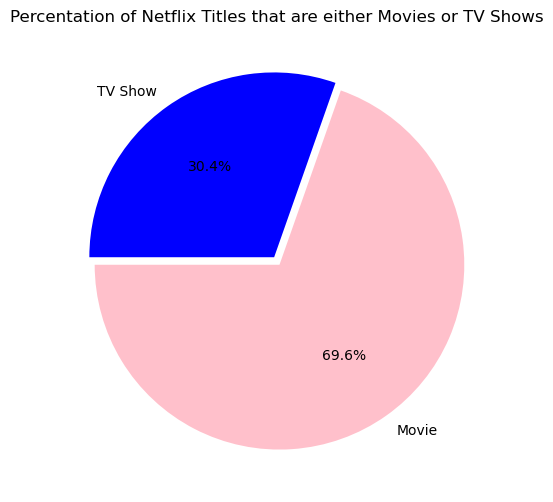

In [381]:
plt.figure(figsize=(12,6))
plt.title('Percentation of Netflix Titles that are either Movies or TV Shows')
g = plt.pie(dataf.type.value_counts(),explode=(0.025,0.025), labels=dataf.type.value_counts().index, colors=['pink','blue'],autopct='%1.1f%%', startangle=180)
plt.show()